<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/salzcamino/handson-ml3/blob/main/practice/Chapter04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [1]:
import numpy as np
# Generate some linear looking data to test Normal Equation (4-4)
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m,1)

In [2]:
# Computing theta, the value to minimize the MSE
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [3]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
# Make predictions using theta
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

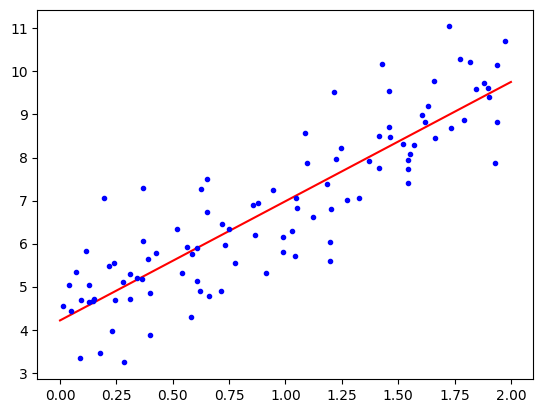

In [7]:
# Plot the predictions
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X,y,"b.")
plt.show()

In [8]:
# Performing LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
# Using the scipy least squares function
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [13]:
# Implementing gradient descent
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2,1) # random inititalization of model params

for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

In [14]:
# Implementing stochastic gradient descent (SGD)
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparams

def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD don't divide by m
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [15]:
# Linear Regression with SGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-5, penalty = None, eta0 = 0.01,
                       n_iter_no_change = 100, random_state = 42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [17]:
# Polynomial regression
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

In [18]:
# Transforming our training data to polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [19]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

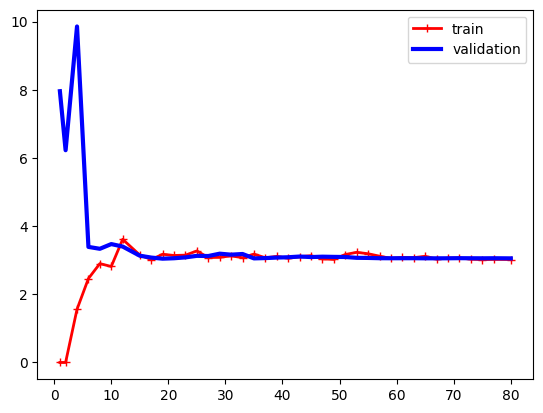

In [23]:
# Plotting learning curves to determine under/overfitting
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv = 5,
    scoring = "neg_mean_squared_error"
)
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = "train")
plt.plot(train_sizes, valid_errors, "b-", linewidth = 3, label = "validation")
plt.legend()
plt.show()

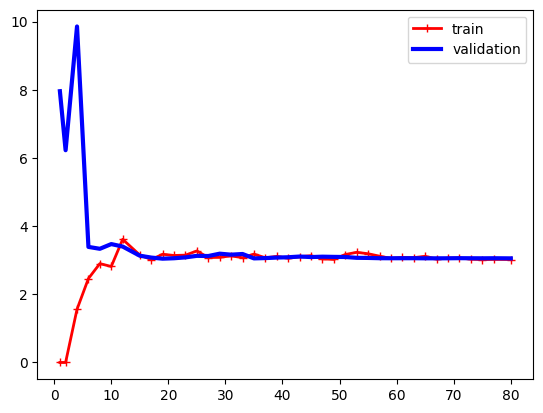

In [25]:
# Learning curves for a polynomial model
from sklearn.pipeline import make_pipeline
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias =False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv = 5,
    scoring = "neg_root_mean_squared_error"
)

plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = "train")
plt.plot(train_sizes, valid_errors, "b-", linewidth = 3, label = "validation")
plt.legend()
plt.show()

**Bias/Variance Trade-off**

A model's error is thought to be consistening of three errors:

1- Bias: Wrong assumptions about the data's shape. Results in underfitting.

2- Variance: Model is too sensitive to changes, such as a 10th degree polynomial. Results in overfitting.

3- Irreducible error: Related to the noise in the dataset. Can be reduced by cleaning up the data.

Increasing a model's complexity will increase variance and reduce bias, and vice-versa.

**Regularization**

To reduce overfitting, we can regularize a model, i.e: reduce its complexity.

For linear models, regularization is usually achieved by constraining the model's weights. Three typical ways to do this are: ridge regression, lasso regression, and elastic net regression.

Note: it is important to perform scaling when applying regularization. Also the regularization term is only added to the cost during training, then the unregularized cost is used to evaluate the model performance.

In [26]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [28]:
# Ridge regression with SGD
sgd_reg = SGDRegressor(penalty = "l2", alpha = 0.1/m, tol = None,
                       max_iter = 1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])